impor librari yang dibutuhkan

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Membaca dataset

In [8]:
# Load preprocessed dataset
data = pd.read_csv('weatherhistorypreprocessed_data.csv')

memisahkan antara fitur dan target

In [10]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Temperature (C)'])  # 'Temperature (C)' adalah target
y = data['Temperature (C)']

membagi data menjadi data latih dan data uji dengan rasio 70:30

In [11]:
# Split data menjadi 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

melakukan inisialisiasi model

In [12]:
# Inisialisasi model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

menyimpan hasil evaluasi untuk masing masing model

In [13]:
# Simpan hasil evaluasi
results = {}

# Latih dan evaluasi setiap model
for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    # Simpan hasil
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "CV R2 Mean": np.mean(cv_scores),
        "CV R2 Std": np.std(cv_scores)
    }

Menampilkan hasil evaluasi untuk analisis lebih lanjut

In [14]:
# Tampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

Hasil Evaluasi Model:
Linear Regression:
  MAE: 0.19633865664478622
  MSE: 0.053190322641151686
  R2: 0.31175109569866755
  CV R2 Mean: 0.3105119597474685
  CV R2 Std: 0.005526067960507013

Random Forest:
  MAE: 0.10991921789816812
  MSE: 0.026549346803883923
  R2: 0.6564683585214374
  CV R2 Mean: 0.6737133481093173
  CV R2 Std: 0.0049468268900920934

Gradient Boosting:
  MAE: 0.16038865599930602
  MSE: 0.041793820749874026
  R2: 0.4592145730770044
  CV R2 Mean: 0.4596555535431241
  CV R2 Std: 0.005787959163610154



Visualisasi hasil evaluasi untuk perbandingan

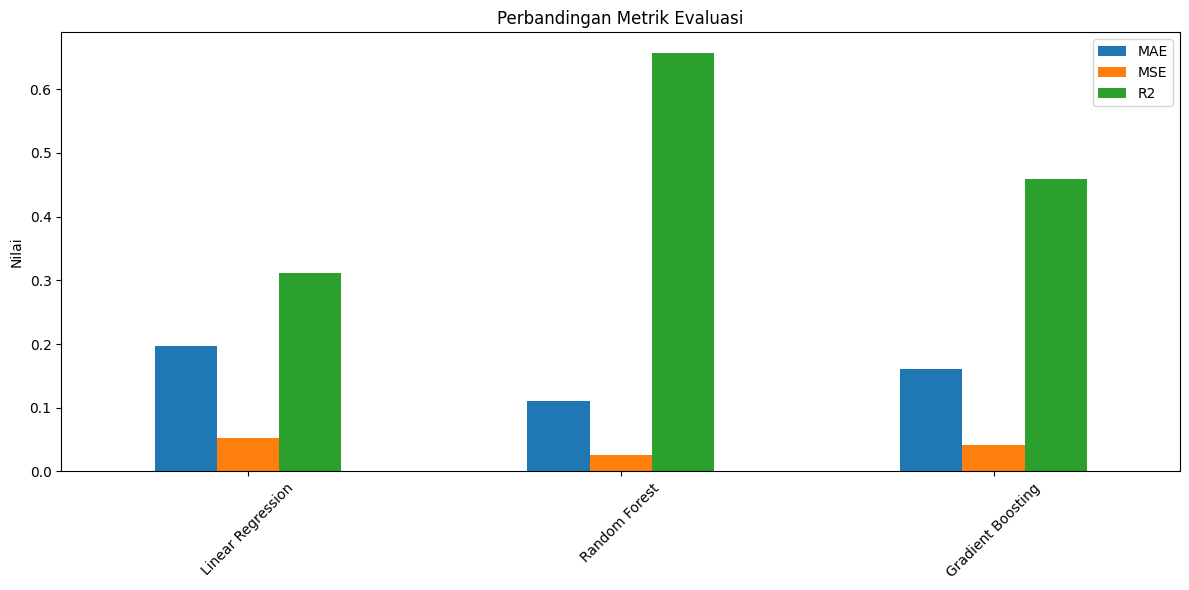

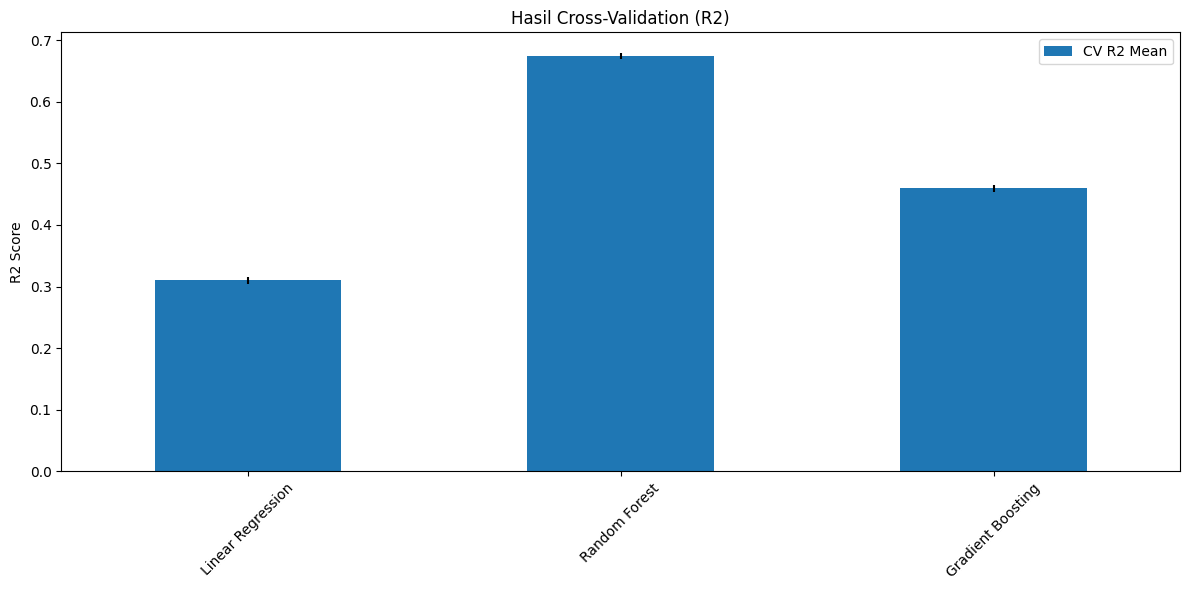

In [16]:
# Visualisasi hasil perbandingan
metrics_df = pd.DataFrame(results).T

# Bar chart untuk setiap metrik
metrics_df[["MAE", "MSE", "R2"]].plot(kind="bar", figsize=(12, 6), title="Perbandingan Metrik Evaluasi")
plt.ylabel("Nilai")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Cross-Validation R2
metrics_df[["CV R2 Mean"]].plot(kind="bar", yerr=metrics_df["CV R2 Std"], figsize=(12, 6), title="Hasil Cross-Validation (R2)")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analisis dan interprestasi hasil

In [17]:
# Analisis dan Interpretasi
best_model = max(results, key=lambda k: results[k]["R2"])
print(f"Model terbaik berdasarkan R2 adalah: {best_model}")

# Interpretasi
print("\nInterpretasi Hasil:")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"- Mean Absolute Error (MAE): {metrics['MAE']:.4f} -> Rata-rata selisih absolut antara prediksi dan nilai sebenarnya.")
    print(f"- Mean Squared Error (MSE): {metrics['MSE']:.4f} -> Mengukur rata-rata kesalahan kuadrat untuk penalti besar terhadap kesalahan besar.")
    print(f"- R-squared (R2): {metrics['R2']:.4f} -> Proporsi variabilitas target yang dapat dijelaskan oleh model.")
    print(f"- Cross-Validation R2 Mean: {metrics['CV R2 Mean']:.4f} (dengan std {metrics['CV R2 Std']:.4f}) -> Performa rata-rata model berdasarkan 5-fold cross-validation.")


Model terbaik berdasarkan R2 adalah: Random Forest

Interpretasi Hasil:

Model: Linear Regression
- Mean Absolute Error (MAE): 0.1963 -> Rata-rata selisih absolut antara prediksi dan nilai sebenarnya.
- Mean Squared Error (MSE): 0.0532 -> Mengukur rata-rata kesalahan kuadrat untuk penalti besar terhadap kesalahan besar.
- R-squared (R2): 0.3118 -> Proporsi variabilitas target yang dapat dijelaskan oleh model.
- Cross-Validation R2 Mean: 0.3105 (dengan std 0.0055) -> Performa rata-rata model berdasarkan 5-fold cross-validation.

Model: Random Forest
- Mean Absolute Error (MAE): 0.1099 -> Rata-rata selisih absolut antara prediksi dan nilai sebenarnya.
- Mean Squared Error (MSE): 0.0265 -> Mengukur rata-rata kesalahan kuadrat untuk penalti besar terhadap kesalahan besar.
- R-squared (R2): 0.6565 -> Proporsi variabilitas target yang dapat dijelaskan oleh model.
- Cross-Validation R2 Mean: 0.6737 (dengan std 0.0049) -> Performa rata-rata model berdasarkan 5-fold cross-validation.

Model: Gr

Contoh hasil prediksi berdasarkan model terbaik

In [18]:
# Contoh Prediksi dan Perbandingan
sample_preds = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": models[best_model].predict(X_test)
}).head(10)

print("\nContoh Prediksi:")
print(sample_preds)


Contoh Prediksi:
     Actual  Predicted
0  0.684854   0.608526
1  0.472789   0.632305
2  0.332724   0.498189
3  0.224019   0.630568
4  0.022360   0.089210
5  0.487414   0.658020
6  0.636057   0.636671
7  0.372240   0.372263
8  0.996344   0.571980
9  0.957249   0.848959
